In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_style("whitegrid")

In [33]:
df=pd.read_csv("/home/lucas/Downloads/HIST_PAINEL_COVIDBR_24fev2021.csv", sep=';')

In [34]:
df['data']=pd.to_datetime(df['data'])

In [35]:
state_pop=df.groupby("municipio")[['estado','populacaoTCU2019']].first().groupby("estado").sum()

In [36]:
cols=['casosNovos', 'obitosNovos']
dict_cols={k:'sum' for k in cols}

In [47]:
tab=df.groupby('estado').agg(dict_cols).join(state_pop)
tab

,casosNovos,obitosNovos,populacaoTCU2019
estado,,,
AC,111762,1950,881935.0
AL,258890,5918,3200210.0
AM,621838,21284,4144597.0
AP,165736,2262,845731.0
BA,1329808,22776,14388651.0
CE,831328,22174,9034997.0
DF,585428,9582,3015268.0
ES,643070,12674,3913800.0
GO,775164,16818,6704719.0


In [49]:
1000*tab.casosNovos.sum()/tab.populacaoTCU2019.sum()

102.6158437214088

In [52]:
tab['casosNovos']=1000*tab['casosNovos']/tab['populacaoTCU2019']
tab['obitosNovos']=1000*tab['obitosNovos']/tab['populacaoTCU2019']

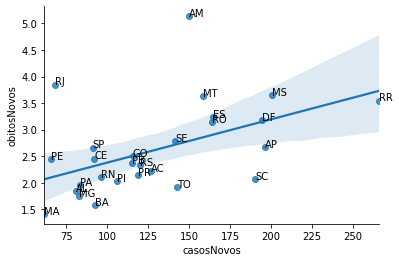

In [59]:
fig, ax = plt.subplots()
ax=sns.regplot(x=tab['casosNovos'],y=tab['obitosNovos'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i, txt in enumerate(tab.index):
    ax.annotate(txt, (tab['casosNovos'][i], tab['obitosNovos'][i]))